In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
item = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
sellers = pd.read_csv("../data/raw/olist_sellers_dataset.csv")
order = pd.read_csv("../data/raw/olist_orders_dataset.csv")
product = pd.read_csv("../data/raw/olist_products_dataset.csv")
payment = pd.read_csv("../data/raw/olist_order_payments_dataset.csv")
review = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")
customer = pd.read_csv("../data/raw/olist_customers_dataset.csv")
category = pd.read_csv("../data/raw/product_category_name_translation.csv")
geolocation = pd.read_csv("../data/raw/olist_geolocation_dataset.csv")

In [3]:
# -------------------- Merge --------------------
dataframe = customer.merge(order, on='customer_id')
dataframe = dataframe.merge(review, on='order_id')
dataframe = dataframe.merge(payment, on='order_id', validate='m:m')
dataframe = dataframe.merge(item, on='order_id')
dataframe = dataframe.merge(product, on='product_id')
dataframe= dataframe.merge(category, on='product_category_name', how='left')

In [4]:
df = dataframe.copy()

In [5]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,credit_card,8,335.48,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,credit_card,1,173.30,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,credit_card,8,252.25,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [6]:
df.shape

(117329, 37)

In [7]:
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


In [8]:
comentarios_df = df[['review_score', 'review_comment_title', 'review_comment_message']].dropna()
df = df.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [9]:
# Categórica: preencher com 'unknown'
df['product_category_name'] = df['product_category_name'].fillna('unknown')
df['product_category_name_english']= df['product_category_name_english'].fillna('unknown')

# Colunas numéricas: preencher com a mediana
cols_numericas = ['product_name_lenght', 'product_description_lenght',
                  'product_photos_qty', 'product_weight_g',
                  'product_length_cm', 'product_height_cm', 'product_width_cm']

df['product_category_name'] = df['product_category_name'].fillna('unknown')

for col in cols_numericas:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)

In [10]:
df = df.dropna(subset=['order_approved_at'])

In [11]:
df[df['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()


order_status
canceled       483
invoiced       370
processing     370
unavailable      7
approved         3
delivered        2
Name: count, dtype: int64

In [12]:
df[df['order_delivered_customer_date'].isnull()]['order_status'].value_counts()


order_status
shipped        1167
canceled        546
invoiced        370
processing      370
delivered         8
unavailable       7
approved          3
Name: count, dtype: int64

In [13]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1235
order_delivered_customer_date    2471
order_estimated_delivery_date       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_cate

In [14]:
df.shape

(117314, 35)

In [15]:
df.describe()

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.000000,117314.00000,117314.000000
mean,35060.001483,4.031428,1.094464,2.940399,172.066821,1.194137,120.525520,20.027653,48.814097,783.121699,2.188230,2110.447142,30.253073,16.61199,23.070708
std,29849.576887,1.387977,0.731220,2.775461,265.402511,0.684261,182.953087,15.828884,9.968631,648.060422,1.711451,3784.671260,16.176495,13.45188,11.745138
min,1003.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000
25%,11250.000000,4.000000,1.000000,1.000000,60.750000,1.000000,39.900000,13.080000,43.000000,348.000000,1.000000,300.000000,18.000000,8.00000,15.000000
50%,24240.000000,5.000000,1.000000,2.000000,108.100000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.00000,20.000000
75%,58770.000000,5.000000,1.000000,4.000000,189.060000,1.000000,134.900000,21.180000,57.000000,976.000000,3.000000,1800.000000,38.000000,20.00000,30.000000
max,99990.000000,5.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000


15


<function matplotlib.pyplot.show(close=None, block=None)>

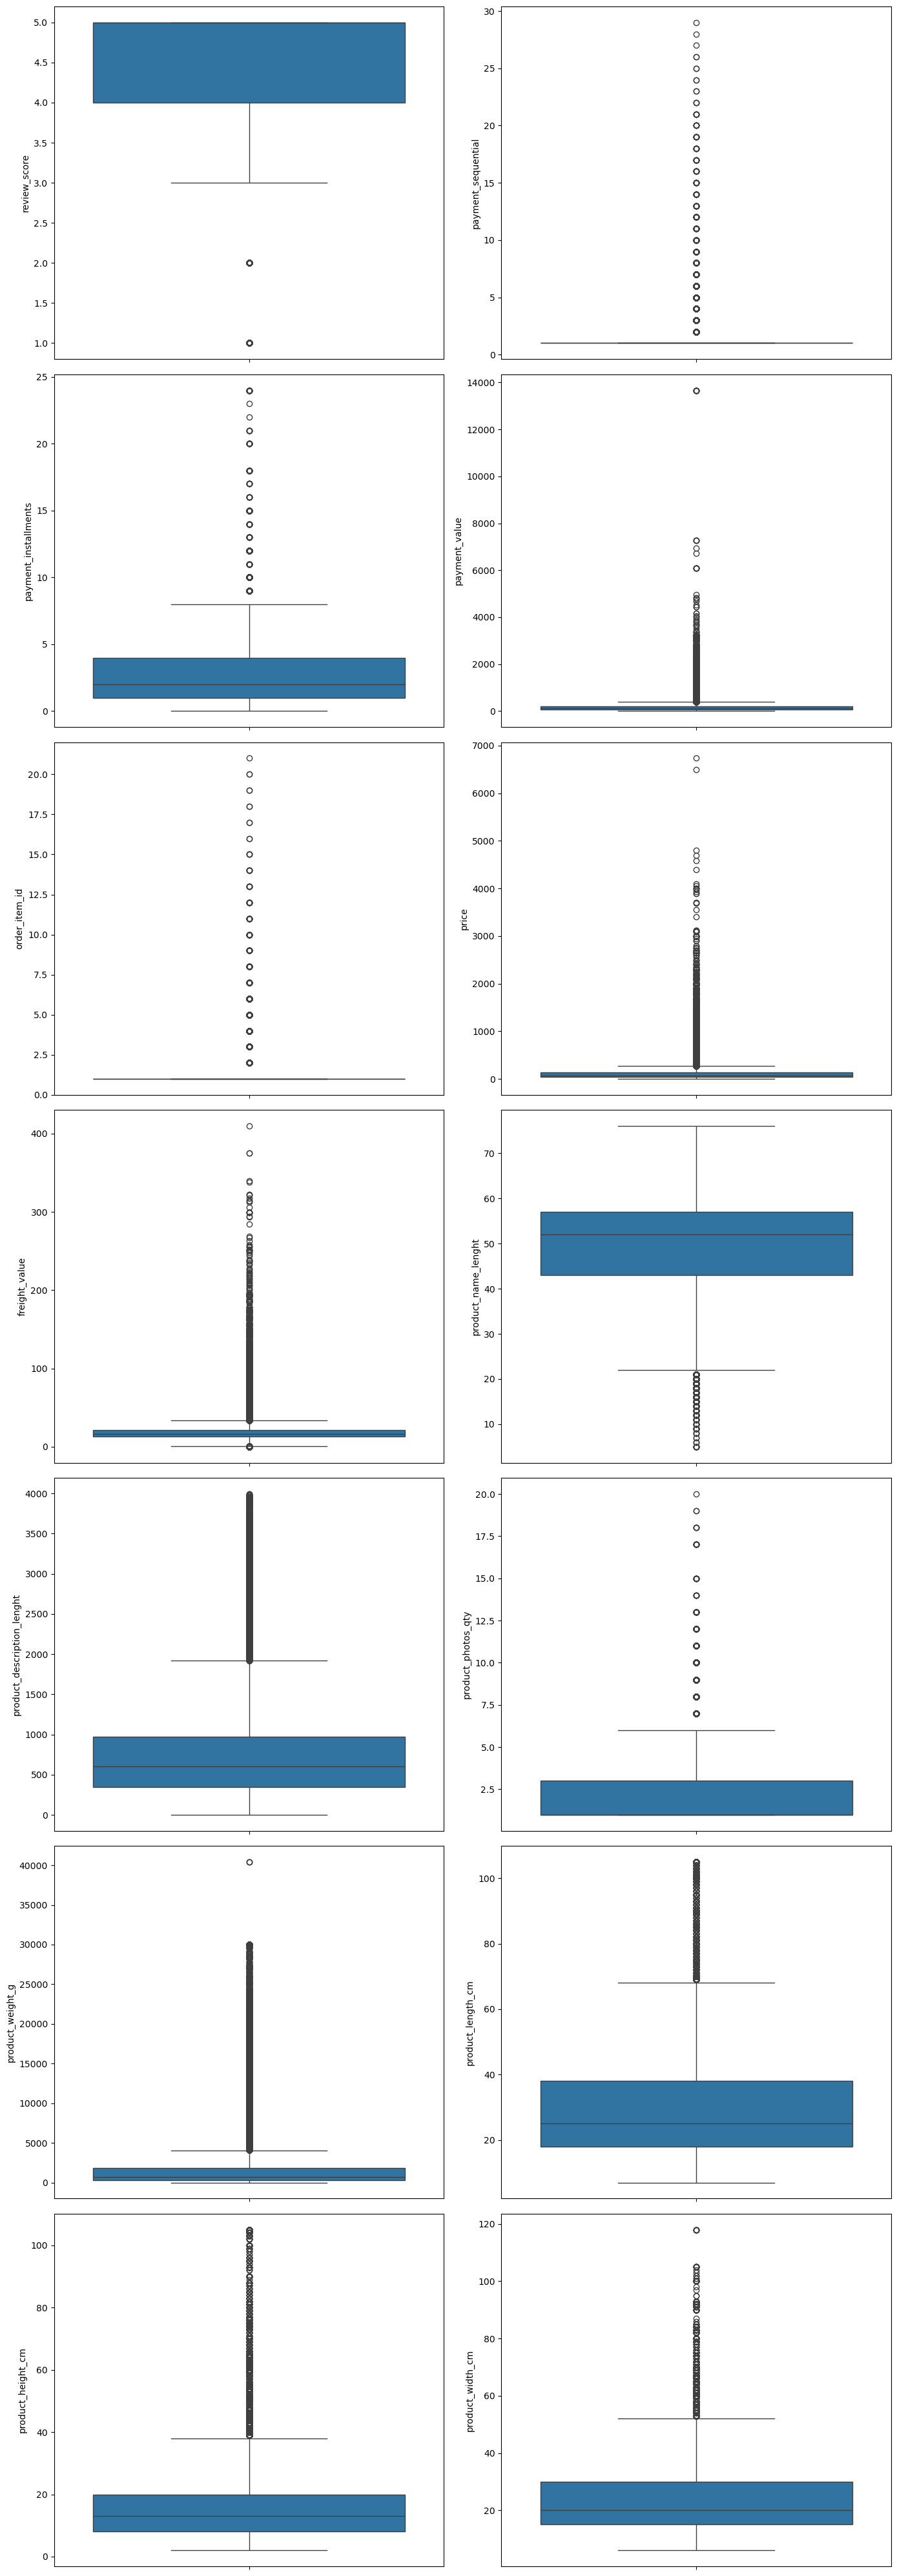

In [16]:
numeric_var = []
for i in df.columns[0:37].tolist():
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        numeric_var.append(i)
print(len(numeric_var))

del numeric_var[0]

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2, figsize=(14, 40)) #8 linhas e 2 colunas
linha = 0
coluna = 0
for i in numeric_var:
    sns.boxplot(data=df, y=i, ax=axes[linha][coluna])
    coluna+=1
    if coluna == 2:
        linha +=1
        coluna = 0
plt.show

In [17]:
print(df[df['payment_installments'] == 0][['payment_value', 'price']].head())

print(df[df['payment_value'] == 0][['price', 'order_item_id']].head())


       payment_value  price
16164         129.94  41.69
16165         129.94  41.69
94049          58.69  45.90
        price  order_item_id
19296   56.99              1
30301  392.55              1
30310  392.55              1
60979   94.00              1
61815   59.00              1


In [18]:
# Lista das colunas que queremos analisar
colunas_outlier = ['payment_value', 'price', 'product_weight_g']

# Função para mostrar valores extremos por coluna
def analisar_outliers(df, colunas, limite_superior=0.99):
    for col in colunas:
        print(f"\n--- {col.upper()} ---")
        print(df[col].describe())
        
        # Valor de corte para top 1% (ou outro quantil que quiser)
        limiar = df[col].quantile(limite_superior)
        print(f"\nValores acima do {int(limite_superior * 100)}º percentil ({limiar:.2f}):")
        display(df[df[col] > limiar].sort_values(by=col, ascending=False).head())

# Rodar a análise
analisar_outliers(df, colunas_outlier)



--- PAYMENT_VALUE ---
count    117314.000000
mean        172.066821
std         265.402511
min           0.000000
25%          60.750000
50%         108.100000
75%         189.060000
max       13664.080000
Name: payment_value, dtype: float64

Valores acima do 99º percentil (1202.64):


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
7334,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
7338,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
7337,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
7331,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony
7336,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,211fa81a22870cc634265ea85b751e40,1,2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony



--- PRICE ---
count    117314.000000
mean        120.525520
std         182.953087
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

Valores acima do 99º percentil (890.00):


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
15906,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,e2fbd9f0ef7b724c7ecb351601a857e7,5,2017-03-04 00:00:00,2017-03-04 21:40:41,1,credit_card,8,6929.31,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares
4623,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,f5136e38d1a14a4dbd87dff67da82701,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,1b73e6c7cd135008ebeb18404b776ddc,5,2017-06-06 00:00:00,2017-06-07 19:35:23,1,boleto,1,6726.66,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art
32276,df55c14d1476a9a3467f131269c2477f,da122df9eeddfedc1dc1f5349a1a690c,28970,araruama,RJ,a96610ab360d42a2e5335a3998b4718a,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02 00:00:00,52632252782892317727260a87bc0663,5,2017-04-18 00:00:00,2017-04-21 15:17:33,1,credit_card,10,4950.34,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances
14220,24bbf5fd2f2e1b359ee7de94defc4a15,eebb5dda148d3893cdaf5b5ca3040ccb,9341,maua,SP,199af31afc78c699f0dbf71fb178d4d4,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15 00:00:00,dbf39e1ecc23738d2e7b56875fb49fac,4,2017-05-08 00:00:00,2017-05-09 02:00:10,1,credit_card,8,4764.34,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances
48058,3d979689f636322c62418b6346b1c6d2,48e1ac109decbb87765a3eade6854098,58038,joao pessoa,PB,8dbc85d1447242f3b127dda390d56e19,delivered,2018-06-22 12:23:19,2018-06-22 12:36:36,2018-06-22 13:00:00,2018-07-06 01:08:30,2018-07-17 00:00:00,5740810e4d16fe8fc6a1b959558f63a5,5,2018-07-06 00:00:00,2018-07-06 21:30:22,1,credit_card,8,4681.78,1,259037a6a41845e455183f89c5035f18,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.0,91.78,pcs,55.0,1710.0,2.0,2900.0,35.0,10.0,40.0,computers



--- PRODUCT_WEIGHT_G ---
count    117314.000000
mean       2110.447142
std        3784.671260
min           0.000000
25%         300.000000
50%         700.000000
75%        1800.000000
max       40425.000000
Name: product_weight_g, dtype: float64

Valores acima do 99º percentil (18600.00):


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
15505,958279c23050d6207d196c3057648f6f,de00290d2a997f24e1706fdc2d366a0e,11730,mongagua,SP,6ecf1a4051b4c5ed613624b460970a26,delivered,2017-11-17 08:40:57,2017-11-17 08:55:48,2017-11-17 20:36:56,2017-12-01 12:08:23,2017-12-06 00:00:00,13fe815dc5c4076ab42f34545df82ca1,5,2017-12-02 00:00:00,2017-12-04 16:04:31,1,credit_card,2,92.06,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-11-23 08:55:48,80.0,12.06,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table
56279,51934b734e94e61d8efa4523e175c6c3,4fbb5c68b6851f6e35c543f963b43e4c,86455,joaquim tavora,PR,9223919b300f6989e1715333fca0d6ce,delivered,2018-03-01 23:05:31,2018-03-01 23:15:32,2018-03-02 22:33:58,2018-03-27 20:47:27,2018-03-26 00:00:00,1474903cd02494e327de0317af95d846,5,2018-03-28 00:00:00,2018-03-30 12:39:00,1,credit_card,1,96.32,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2018-03-07 23:15:32,80.0,16.32,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table
44768,ccd6a4af78390b7ae560c1cc1cb1a2ff,32d0420a22921ea161d8bff0e0297b71,88820,icara,SC,4a45f9f66971302cf881ecfa142f42ba,delivered,2017-12-23 19:03:24,2017-12-23 19:13:20,2017-12-28 15:13:58,2018-01-25 22:17:15,2018-01-29 00:00:00,62a35e9e362cf9b27b9ee8e047afbedf,1,2018-01-26 00:00:00,2018-01-27 00:42:30,1,credit_card,1,96.32,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-12-29 19:13:20,80.0,16.32,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table
54814,e0bd132faf773c66a3577305ba55f8a9,0e7324b249ec9c5881d8de4d608e8a16,30220,belo horizonte,MG,184d0d273e35638268d90ed9d912ee8c,delivered,2017-09-16 14:01:00,2017-09-16 14:10:18,2017-09-20 19:48:59,2017-09-22 18:29:00,2017-09-28 00:00:00,9987c9676d95e349f9c371539b7cd65e,5,2017-09-23 00:00:00,2017-09-24 09:58:56,1,credit_card,10,506.70,1,97194fdae68fa163b7cc5c02bfedbf16,05f51e13da97139648b8125c31e5f51b,2017-09-21 14:10:18,419.9,86.80,bebes,51.0,1202.0,4.0,30000.0,81.0,50.0,50.0,baby
112825,a86efb07b29b0ab31a5c6047c600edab,ecf7874aa8a2586adf6ca37fab21ecc2,29303,cachoeiro de itapemirim,ES,0b6230647ed16f4b3e70282dc4b5b87f,delivered,2018-05-16 13:05:37,2018-05-17 19:36:10,2018-05-30 12:38:00,2018-06-12 19:06:34,2018-06-14 00:00:00,2456e7efff67f311120496a395833db6,2,2018-06-13 00:00:00,2018-06-14 11:33:01,1,credit_card,10,1371.88,1,46e24ce614899e36617e37ea1e4aa6ff,17f51e7198701186712e53a39c564617,2018-06-01 19:14:24,1050.0,321.88,beleza_saude,58.0,549.0,1.0,30000.0,55.0,75.0,61.0,health_beauty


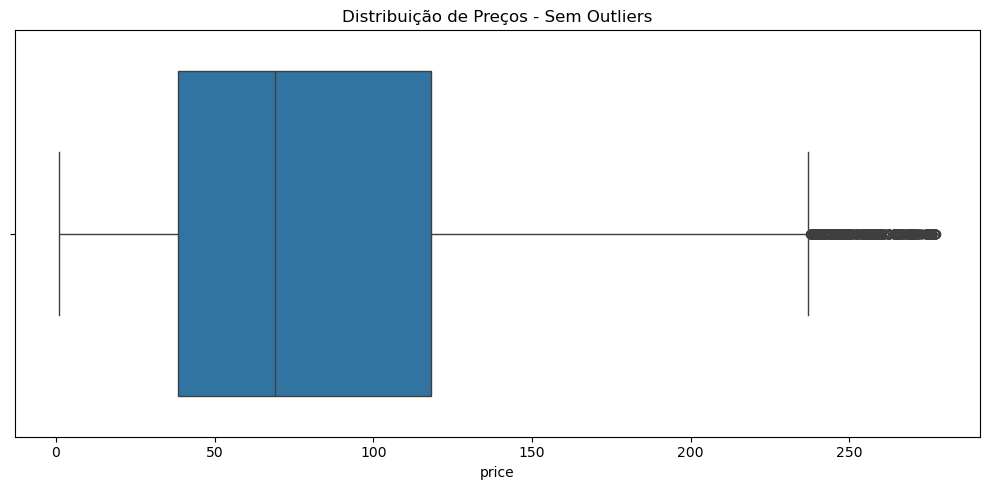

In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_sem_outliers['price'])
plt.title('Distribuição de Preços - Sem Outliers')
plt.show()


In [27]:
# Ver o maior
df[df['product_weight_g'] == df['product_weight_g'].max()]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
15505,958279c23050d6207d196c3057648f6f,de00290d2a997f24e1706fdc2d366a0e,11730,mongagua,SP,6ecf1a4051b4c5ed613624b460970a26,delivered,2017-11-17 08:40:57,2017-11-17 08:55:48,2017-11-17 20:36:56,2017-12-01 12:08:23,2017-12-06 00:00:00,13fe815dc5c4076ab42f34545df82ca1,5,2017-12-02 00:00:00,2017-12-04 16:04:31,1,credit_card,2,92.06,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-11-23 08:55:48,80.0,12.06,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table
44768,ccd6a4af78390b7ae560c1cc1cb1a2ff,32d0420a22921ea161d8bff0e0297b71,88820,icara,SC,4a45f9f66971302cf881ecfa142f42ba,delivered,2017-12-23 19:03:24,2017-12-23 19:13:20,2017-12-28 15:13:58,2018-01-25 22:17:15,2018-01-29 00:00:00,62a35e9e362cf9b27b9ee8e047afbedf,1,2018-01-26 00:00:00,2018-01-27 00:42:30,1,credit_card,1,96.32,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-12-29 19:13:20,80.0,16.32,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table
56279,51934b734e94e61d8efa4523e175c6c3,4fbb5c68b6851f6e35c543f963b43e4c,86455,joaquim tavora,PR,9223919b300f6989e1715333fca0d6ce,delivered,2018-03-01 23:05:31,2018-03-01 23:15:32,2018-03-02 22:33:58,2018-03-27 20:47:27,2018-03-26 00:00:00,1474903cd02494e327de0317af95d846,5,2018-03-28 00:00:00,2018-03-30 12:39:00,1,credit_card,1,96.32,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2018-03-07 23:15:32,80.0,16.32,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table


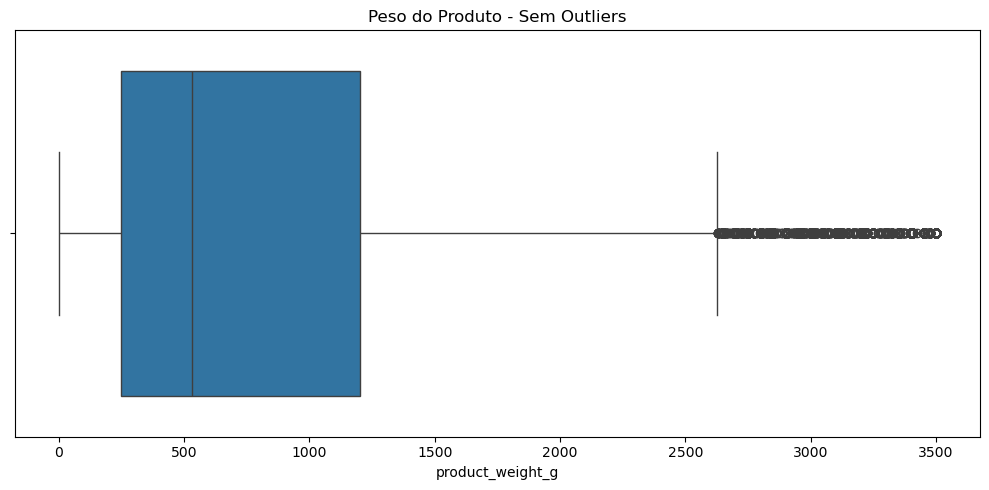

In [28]:
# Definir o limite superior como 3100 para manter os valores reais até esse ponto
limite_superior_ajustado = 3500

# Filtrando os dados para remover apenas os outliers acima de 3100
df = df[df['product_weight_g'] <= limite_superior_ajustado]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['product_weight_g'])
plt.title('Peso do Produto - Sem Outliers')
plt.show()

In [31]:
df['payment_value'].max()

13664.08

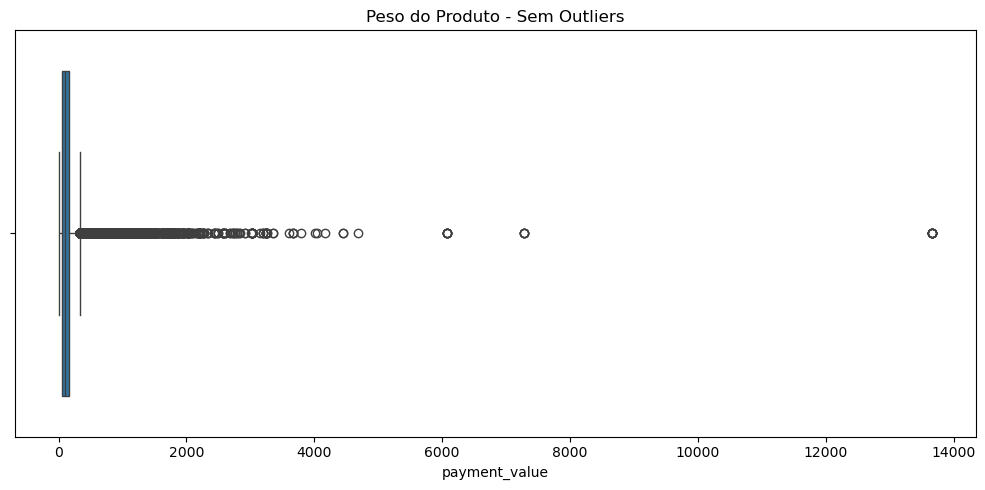

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['payment_value'])
plt.title('Peso do Produto - Sem Outliers')
plt.show()

In [33]:
df['payment_value'].describe()

count    99487.000000
mean       146.320998
std        231.990123
min          0.000000
25%         55.360000
50%         96.660000
75%        164.660000
max      13664.080000
Name: payment_value, dtype: float64

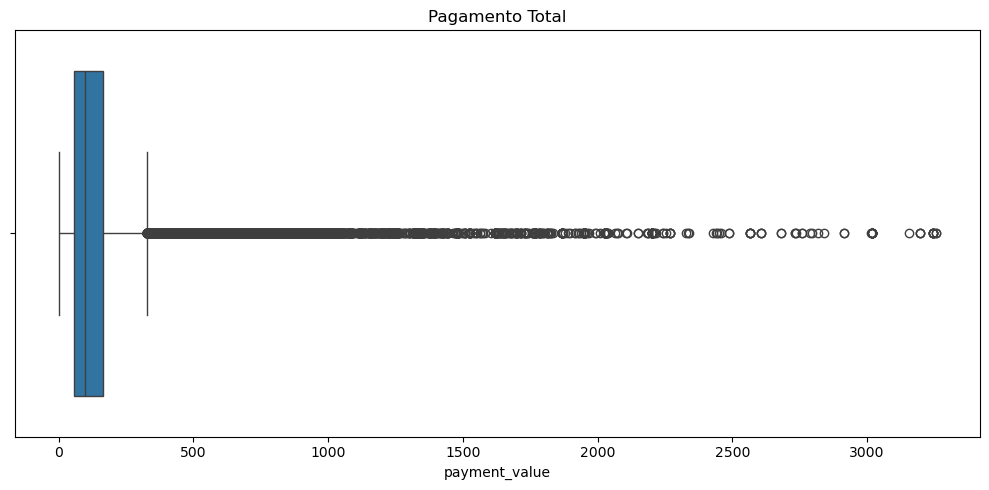

In [37]:
limite_superior_ajustado = 3300

# Filtrando os dados para remover apenas os outliers acima de 3100
df = df[df['payment_value'] <= limite_superior_ajustado]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['payment_value'])
plt.title('Pagamento Total')
plt.show()

In [38]:
df['payment_value'].describe()

count    99456.000000
mean       144.096055
std        181.889348
min          0.000000
25%         55.360000
50%         96.650000
75%        164.585000
max       3256.140000
Name: payment_value, dtype: float64